<a href="https://colab.research.google.com/github/shivakumar0001/AD/blob/main/13_K_Means__11_02_25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
import pandas as pd
file_path = "/content/income.csv"

In [7]:
df = pd.read_csv(file_path)
df.head(10)

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000
5,Gautam,39,155000
6,David,41,160000
7,Andrea,38,162000
8,Brad,36,156000
9,Angelina,35,130000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Name       22 non-null     object
 1   Age        22 non-null     int64 
 2   Income($)  22 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 660.0+ bytes


Text(0, 0.5, 'Income ($)')

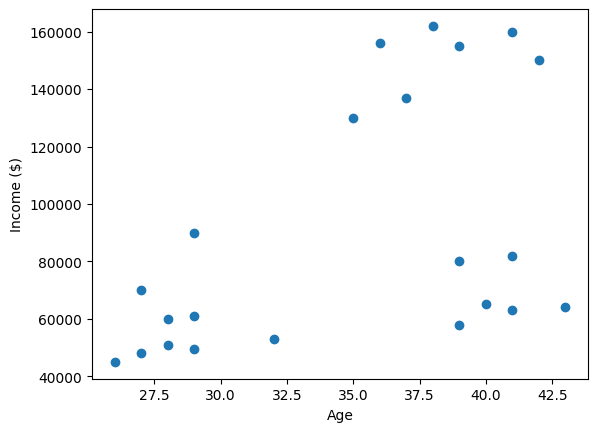

In [11]:
plt.scatter(df.Age,df['Income($)'])
plt.xlabel('Age')
plt.ylabel('Income ($)')

In [12]:
df

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000
5,Gautam,39,155000
6,David,41,160000
7,Andrea,38,162000
8,Brad,36,156000
9,Angelina,35,130000


In [14]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted

array([0, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0],
      dtype=int32)

In [18]:
df['cluster']=y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,0
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1


In [19]:
km.cluster_centers_

array([[3.24166667e+01, 5.72916667e+04],
       [3.82857143e+01, 1.50000000e+05],
       [3.63333333e+01, 8.40000000e+04]])

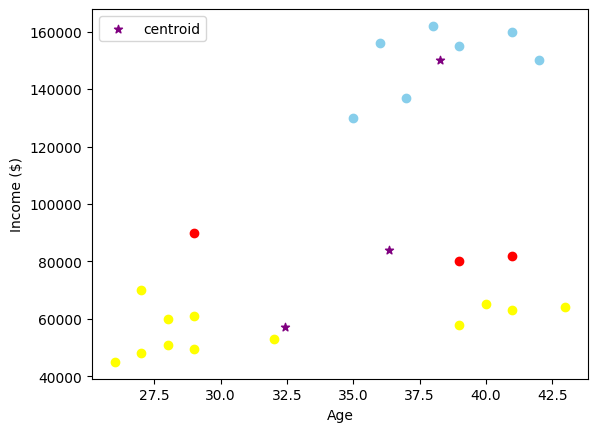

In [25]:
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]
plt.scatter(df1.Age,df1['Income($)'],color='yellow')
plt.scatter(df2.Age,df2['Income($)'],color='skyblue')
plt.scatter(df3.Age,df3['Income($)'],color='red')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.legend()

In [32]:
scaler = MinMaxScaler()

scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])

scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])

scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])

df.head

<bound method NDFrame.head of         Name       Age  Income($)  cluster
0        Rob  0.058824   0.213675        0
1    Michael  0.176471   0.384615        2
2      Mohan  0.176471   0.136752        0
3     Ismail  0.117647   0.128205        0
4       Kory  0.941176   0.897436        1
5     Gautam  0.764706   0.940171        1
6      David  0.882353   0.982906        1
7     Andrea  0.705882   1.000000        1
8       Brad  0.588235   0.948718        1
9   Angelina  0.529412   0.726496        1
10    Donald  0.647059   0.786325        1
11       Tom  0.000000   0.000000        0
12    Arnold  0.058824   0.025641        0
13     Jared  0.117647   0.051282        0
14     Stark  0.176471   0.038462        0
15    Ranbir  0.352941   0.068376        0
16    Dipika  0.823529   0.170940        0
17  Priyanka  0.882353   0.153846        0
18      Nick  1.000000   0.162393        0
19      Alia  0.764706   0.299145        2
20       Sid  0.882353   0.316239        2
21     Abdul  0.764706   0.111111        0>